In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## create dataset
# reference https://zhuanlan.zhihu.com/p/36982945
def test_data(sample_number = 1000):
    #随机从高斯分布中生成两个数据集
    mean0=[2,3]
    cov=np.mat([[1,0],[0,2]])
    data1=np.random.multivariate_normal(mean0,cov,sample_number)

    mean1=[7,8]
    cov=np.mat([[1,0],[0,2]])
    data2=np.random.multivariate_normal(mean1,cov,sample_number)
    
    y1 = np.zeros((sample_number,1))#第一类，标签为0
    y2 = np.ones((sample_number,1))#第二类类，标签为1
    
    train_data = np.vstack((data1,data2))
    train_label = np.vstack((y1,y2))
    
    shuffle_idx = np.arange(sample_number*2)
    np.random.shuffle(shuffle_idx)
    
    train_data = train_data[shuffle_idx]
    train_label = train_label[shuffle_idx]
    return train_data,train_label

In [3]:
samples_num = 1000
train_data,train_label = test_data(samples_num)

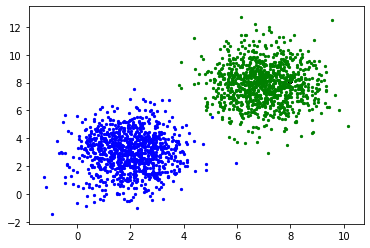

In [4]:
# plot the train data
plt.scatter(train_data[np.argwhere(train_label==0),0],train_data[np.argwhere(train_label==0),1],s=5,c='b')
plt.scatter(train_data[np.argwhere(train_label==1),0],train_data[np.argwhere(train_label==1),1],s=5,c='g')

# construct model

In [5]:
import tensorflow as tf

In [6]:
x = tf.keras.Input(shape=[2,])
y =tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(x)
model = tf.keras.models.Model(inputs=x,outputs=y)

In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [8]:
model.fit(train_data,train_label,epochs=100)

Train on 2000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 337us/sample - loss: 0.9394 - accuracy: 0.6210
Epoch 2/100
2000/2000 [==============================] - 0s 60us/sample - loss: 0.5526 - accuracy: 0.7060
Epoch 3/100
2000/2000 [==============================] - 0s 61us/sample - loss: 0.5293 - accuracy: 0.7205
Epoch 4/100
2000/2000 [==============================] - 0s 64us/sample - loss: 0.5080 - accuracy: 0.7325
Epoch 5/100
2000/2000 [==============================] - 0s 59us/sample - loss: 0.4875 - accuracy: 0.7420
Epoch 6/100
2000/2000 [==============================] - 0s 63us/sample - loss: 0.4687 - accuracy: 0.7580
Epoch 7/100
2000/2000 [==============================] - 0s 62us/sample - loss: 0.4513 - accuracy: 0.7660
Epoch 8/100
2000/2000 [==============================] - 0s 61us/sample - loss: 0.4345 - accuracy: 0.7845
Epoch 9/100
2000/2000 [==============================] - 0s 63us/sample - loss: 0.4192 - accuracy: 0.7985
Epoch 10/100
2000/2000 

2000/2000 [==============================] - 0s 63us/sample - loss: 0.1217 - accuracy: 0.9960
Epoch 78/100
2000/2000 [==============================] - 0s 65us/sample - loss: 0.1206 - accuracy: 0.9960
Epoch 79/100
2000/2000 [==============================] - 0s 62us/sample - loss: 0.1194 - accuracy: 0.9960
Epoch 80/100
2000/2000 [==============================] - 0s 62us/sample - loss: 0.1183 - accuracy: 0.9960
Epoch 81/100
2000/2000 [==============================] - 0s 61us/sample - loss: 0.1171 - accuracy: 0.9960
Epoch 82/100
2000/2000 [==============================] - 0s 63us/sample - loss: 0.1160 - accuracy: 0.9960
Epoch 83/100
2000/2000 [==============================] - 0s 62us/sample - loss: 0.1150 - accuracy: 0.9960
Epoch 84/100
2000/2000 [==============================] - 0s 61us/sample - loss: 0.1139 - accuracy: 0.9960
Epoch 85/100
2000/2000 [==============================] - 0s 61us/sample - loss: 0.1129 - accuracy: 0.9960
Epoch 86/100
2000/2000 [==========================

## draw model

In [11]:
x1 = np.linspace(-2,12,1000)
x2 = np.linspace(-2,12,1000)
test_x = np.vstack((x1,x2)).T

In [12]:
test_y = model.predict(test_x)

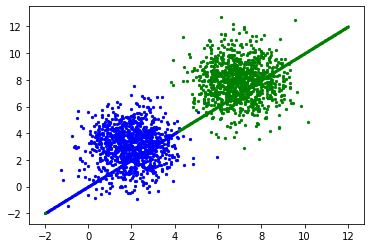

In [16]:
# plot the train data
plt.scatter(train_data[np.argwhere(train_label==0),0],train_data[np.argwhere(train_label==0),1],s=5,c='b')
plt.scatter(train_data[np.argwhere(train_label==1),0],train_data[np.argwhere(train_label==1),1],s=5,c='g')
#plot line
plt.scatter(test_x[np.argwhere(test_y<0.5),0],test_x[np.argwhere(test_y<0.5),1],s=2,c='b')
plt.scatter(test_x[np.argwhere(test_y>=0.5),0],test_x[np.argwhere(test_y>=0.5),1],s=2,c='g')